<a href="https://colab.research.google.com/github/Maker-Kim/Study/blob/master/python/Coin_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit
!pip install pykrx

     |████████████████████████████████| 112kB 9.3MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 256kB 12.8MB/s 


In [2]:
import pyupbit
from pykrx import stock
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [3]:
# BTC 최근 200시간의 데이터 불러옴

df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")

In [4]:
# 시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds', 'y']]

In [29]:
#학습
#튜닝 전
# model = Prophet()
# model.fit(data)


#학습
#튜닝 후
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.5,
    changepoint_range=0.9,
)
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [30]:
#24시간 예측
future = model.make_future_dataframe(periods=24, freq='H')

forecast = model.predict(future)

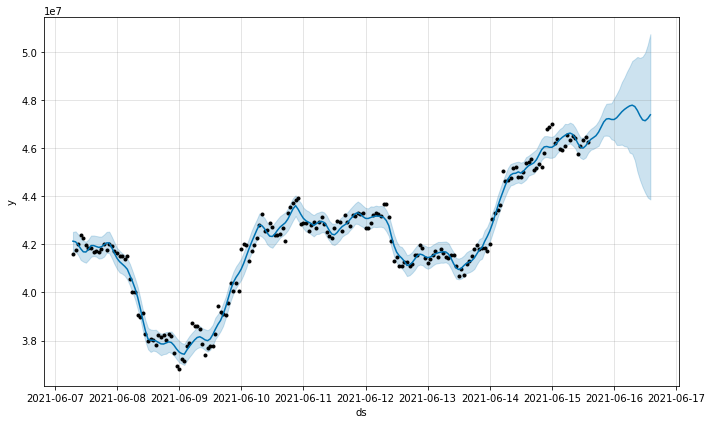

In [32]:
# 그래프1
fig1 = model.plot(forecast)
#a = add_changepoints_to_plot(fig1.gca(), model, forecast)

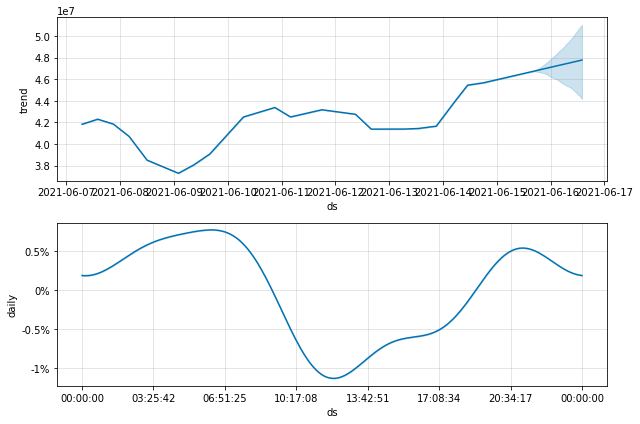

In [34]:
# 그래프2
fig2 = model.plot_components(forecast)

In [35]:
#가격 조회
nowValue = pyupbit.get_current_price("KRW-BTC")
closeValue = forecast['yhat'].values[-1]

print("현재가 : " , nowValue)
print("24시간뒤의 가격: ", closeValue)


현재가 :  46354000.0
24시간뒤의 가격:  47390411.28943273


In [36]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-06-07 07:00:00,4.182767e+07,4.170228e+07,4.252121e+07,4.182767e+07,4.182767e+07,0.007312,0.007312,0.007312,0.007312,0.007312,0.007312,0.0,0.0,0.0,4.213353e+07
1,2021-06-07 08:00:00,4.189453e+07,4.169432e+07,4.254256e+07,4.189453e+07,4.189453e+07,0.005101,0.005101,0.005101,0.005101,0.005101,0.005101,0.0,0.0,0.0,4.210822e+07
2,2021-06-07 09:00:00,4.196140e+07,4.156146e+07,4.242030e+07,4.196140e+07,4.196140e+07,0.000633,0.000633,0.000633,0.000633,0.000633,0.000633,0.0,0.0,0.0,4.198798e+07
3,2021-06-07 10:00:00,4.202827e+07,4.135363e+07,4.224289e+07,4.202827e+07,4.202827e+07,-0.004995,-0.004995,-0.004995,-0.004995,-0.004995,-0.004995,0.0,0.0,0.0,4.181834e+07
4,2021-06-07 11:00:00,4.209514e+07,4.128464e+07,4.214864e+07,4.209514e+07,4.209514e+07,-0.009582,-0.009582,-0.009582,-0.009582,-0.009582,-0.009582,0.0,0.0,0.0,4.169178e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-06-16 10:00:00,4.758822e+07,4.467662e+07,4.975700e+07,4.505614e+07,4.994013e+07,-0.004995,-0.004995,-0.004995,-0.004995,-0.004995,-0.004995,0.0,0.0,0.0,4.735053e+07
220,2021-06-16 11:00:00,4.763625e+07,4.439046e+07,4.980580e+07,4.484278e+07,5.024420e+07,-0.009582,-0.009582,-0.009582,-0.009582,-0.009582,-0.009582,0.0,0.0,0.0,4.717980e+07
221,2021-06-16 12:00:00,4.768427e+07,4.414980e+07,4.997209e+07,4.463713e+07,5.051568e+07,-0.011362,-0.011362,-0.011362,-0.011362,-0.011362,-0.011362,0.0,0.0,0.0,4.714248e+07
222,2021-06-16 13:00:00,4.773229e+07,4.395107e+07,5.030197e+07,4.444927e+07,5.079609e+07,-0.010340,-0.010340,-0.010340,-0.010340,-0.010340,-0.010340,0.0,0.0,0.0,4.723876e+07
